### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.01$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) There could be some strong linear relationship between $x$ and $y$.

(c) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.01.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

#### D

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x doubles (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'>2y$ if b is bigger than one.

(b) $y'<2y$ if b is less than one.

(c) $y'=2y$ in any case.

(d) $y'$ increases by $(2^b-1)*100\%$.

#### ABD

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (3): (30 pt)


In [2]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
y=[28.0, 24.0, 37.0, -7.0, 28.0, 71.0, 89.0, 60.0, 100.0, 108.0, 116.0, 
   110.0, 114.0, 123.0, 124.0, 165.0, 169.0, 211.0, 211.0, 208.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [4]:
# Make the pandas dataframe.
data = pd.DataFrame([x, y]).T
data.columns = ["x", "y"]
data.loc[:,"x2"] = data.x **2
data.loc[:,"y2"] = data.y **2
data.loc[:,"xy"] = data.x * data.y
data.head()

,x,y,x2,y2,xy
0,0.0,28.0,0.0,784.0,0.0
1,1.0,24.0,1.0,576.0,24.0
2,2.0,37.0,4.0,1369.0,74.0
3,3.0,-7.0,9.0,49.0,-21.0
4,4.0,28.0,16.0,784.0,112.0


In [5]:
# use the basic formula to calculate the correlation coefficient
tmp = (20 * data.x2.sum()-data.x.sum() **2 )* (20 * data.y2.sum()-data.y.sum() **2)
corr_xy = (20 * data.xy.sum() - data.x.sum() * data.y.sum()) / tmp ** 0.5
corr_xy

0.9571434929154867

In [6]:
# check the correlation coefficient of x-y with the built-in function
data.corr()

,x,y,x2,y2,xy
x,1.000000,0.957143,0.965326,0.913012,0.947072
y,0.957143,1.000000,0.949006,0.956430,0.963005
x2,0.965326,0.949006,1.000000,0.965804,0.990694
y2,0.913012,0.956430,0.965804,1.000000,0.991949
xy,0.947072,0.963005,0.990694,0.991949,1.000000


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

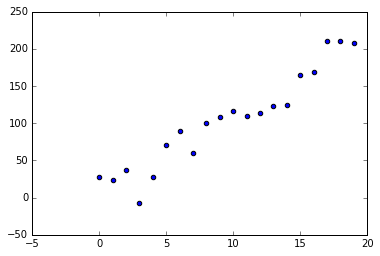

In [7]:
# visulize the data
plt.scatter(data.x,data.y)
plt.show()

In [8]:
# calculate w1. 
w1=(data.xy.sum()-data.y.sum()*data.x.sum()/len(data))/(data.x2.sum()-data.x.sum()*data.x.sum()/len(data))
print("w1 is : {}".format(w1))

w1 is : 10.5466165414


In [9]:
# calculate w0.
w0=(data.y-data.x*w1).mean()
print("w0 is : {}".format(w0))

w0 is : 4.25714285714


In [10]:
# predicted values and errors
data.loc[:,"pred"]=w1*data.x+w0
data.loc[:,"err"]=data.y-data.pred
data.head()

,x,y,x2,y2,xy,pred,err
0,0.0,28.0,0.0,784.0,0.0,4.257143,23.742857
1,1.0,24.0,1.0,576.0,24.0,14.803759,9.196241
2,2.0,37.0,4.0,1369.0,74.0,25.350376,11.649624
3,3.0,-7.0,9.0,49.0,-21.0,35.896992,-42.896992
4,4.0,28.0,16.0,784.0,112.0,46.443609,-18.443609


In [11]:
# caculate R square
R_2=1-(data.err**2).sum()/((data.y-data.y.mean())**2).sum()
R_2

0.9161236660304586

#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [12]:
# regression function 
lm = smf.ols(formula='y ~ x', data = data).fit()
print lm.summary()

# the calculation is correct

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 26 Sep 2016   Prob (F-statistic):           3.96e-11
Time:                        01:16:57   Log-Likelihood:                -86.627
No. Observations:                  20   AIC:                             177.3
Df Residuals:                      18   BIC:                             179.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.2571      8.359      0.509      0.6

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [13]:
data_4 = pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/Session02/Housing_Pluto_Session2.csv")

In [14]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
3,NaN,0,0
4,11201.0,387060,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [15]:
# drop all the rows which contains "NaN" and 0
length = len(data_4)
for i in range(length):
    if pd.isnull(data_4.ZipCode[i]) == True or data_4.LotArea[i] == 0 or data_4.AssessTot[i] == 0:
        data_4 = data_4.drop(i, axis = 0)
        
data_4.head(10)

,ZipCode,LotArea,AssessTot
0,11201.0,151930,1164645
1,11201.0,9620,5864850
2,11201.0,19682,12019950
5,11201.0,6384,21150
10,11201.0,66889,11700
12,11201.0,4644,109620
13,11201.0,517,459
14,11201.0,4293,4590
15,11201.0,80873,679140
16,11201.0,29955,265500


In [16]:
# reset the index of the data 
data_4 = data_4.reset_index()
data_4.head()

,index,ZipCode,LotArea,AssessTot
0,0,11201.0,151930,1164645
1,1,11201.0,9620,5864850
2,2,11201.0,19682,12019950
3,5,11201.0,6384,21150
4,10,11201.0,66889,11700


#### (b). Visualize the data set.

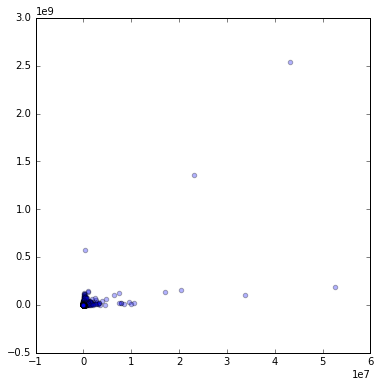

In [17]:
fig1 = plt.figure(figsize = (6,6))
plt.scatter(data_4.LotArea, data_4.AssessTot, alpha=0.3)


#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [18]:
lm_1 = smf.ols(formula='data_4.AssessTot ~ data_4.LotArea', data = data_4).fit()
print lm_1.summary()

                            OLS Regression Results                            
Dep. Variable:       data_4.AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Mon, 26 Sep 2016   Prob (F-statistic):               0.00
Time:                        01:18:42   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275980   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.694e+04   8648.667      8.

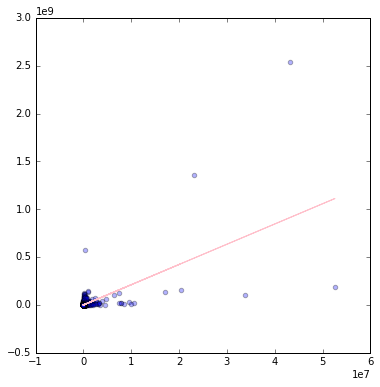

In [19]:
# Visulize the model
data_4.loc[:,"error"]=lm_1.resid
data_4.loc[:,"pred"]=lm_1.predict()
fig2 = plt.figure(figsize = (6, 6))
plt.plot(data_4.LotArea, data_4.pred, color = 'pink')
plt.scatter(data_4.LotArea, data_4.AssessTot, alpha = 0.3)
plt.show()

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [20]:
lm_2 = smf.ols(formula='data_4.AssessTot ~ data_4.LotArea -1', data = data_4).fit()
print lm_2.summary()

                            OLS Regression Results                            
Dep. Variable:       data_4.AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Mon, 26 Sep 2016   Prob (F-statistic):               0.00
Time:                        01:18:46   Log-Likelihood:            -4.6221e+06
No. Observations:              275982   AIC:                         9.244e+06
Df Residuals:                  275981   BIC:                         9.244e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
data_4.LotArea    21.1741      0.051    415.

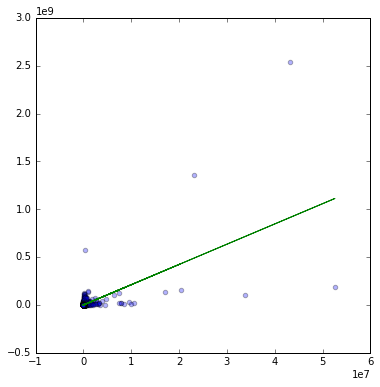

In [21]:
data_4.loc[:,"pred2"] = lm_2.predict()
fig3 = plt.figure(figsize = (6,6))
plt.plot(data_4.LotArea, data_4.pred2, color = 'green')
plt.scatter(data_4.LotArea, data_4.AssessTot, alpha = 0.3)
plt.show()

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [22]:
data_4.loc[:,"log_LotArea"] = np.log(data_4.LotArea)
data_4.loc[:,"log_AssessTot"] = np.log(data_4.AssessTot)
data_4.head()

,index,ZipCode,LotArea,AssessTot,error,pred,pred2,log_LotArea,log_AssessTot
0,0,11201.0,151930,1164645,-2.127195e+06,3.291840e+06,3.216978e+06,11.931175,13.967927
1,1,11201.0,9620,5864850,5.584343e+06,2.805071e+05,2.036946e+05,9.171600,15.584487
2,2,11201.0,19682,12019950,1.152653e+07,4.934228e+05,4.167482e+05,9.887460,16.302078
3,5,11201.0,6384,21150,-1.908821e+05,2.120321e+05,1.351753e+05,8.761550,9.959395
4,10,11201.0,66889,11700,-1.480641e+06,1.492341e+06,1.416313e+06,11.110790,9.367344


In [23]:
lm_3 = smf.ols(formula='data_4.log_AssessTot ~ data_4.log_LotArea', data = data_4).fit()
print lm_3.summary()

                             OLS Regression Results                             
Dep. Variable:     data_4.log_AssessTot   R-squared:                       0.491
Model:                              OLS   Adj. R-squared:                  0.491
Method:                   Least Squares   F-statistic:                 2.659e+05
Date:                  Mon, 26 Sep 2016   Prob (F-statistic):               0.00
Time:                          01:18:50   Log-Likelihood:            -3.4460e+05
No. Observations:                275982   AIC:                         6.892e+05
Df Residuals:                    275980   BIC:                         6.892e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept       

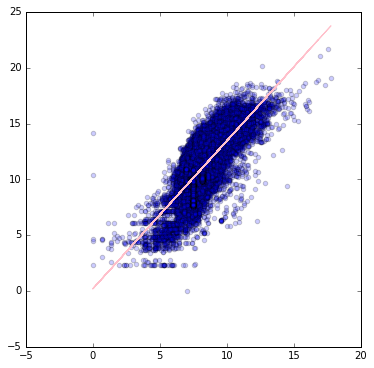

In [24]:
data_4.loc[:,"pred3"] = lm_3.predict()
fig4 = plt.figure(figsize = (6,6))
plt.plot(data_4.log_LotArea, data_4.pred3, color = "pink")
plt.scatter(data_4.log_LotArea, data_4.log_AssessTot, alpha = 0.2)
plt.show()


### *Additional extra-credit question (Using the housing price data set from question (4)) (40 pt to be added to the cumulative homework score up to the maximum of 100%(for whole semester))

#### (a) How many different zip codes are in the data? report the number of observations for each zipcode.

In [25]:
data_4.head()

,index,ZipCode,LotArea,AssessTot,error,pred,pred2,log_LotArea,log_AssessTot,pred3
0,0,11201.0,151930,1164645,-2.127195e+06,3.291840e+06,3.216978e+06,11.931175,13.967927,16.017968
1,1,11201.0,9620,5864850,5.584343e+06,2.805071e+05,2.036946e+05,9.171600,15.584487,12.361119
2,2,11201.0,19682,12019950,1.152653e+07,4.934228e+05,4.167482e+05,9.887460,16.302078,13.309740
3,5,11201.0,6384,21150,-1.908821e+05,2.120321e+05,1.351753e+05,8.761550,9.959395,11.817742
4,10,11201.0,66889,11700,-1.480641e+06,1.492341e+06,1.416313e+06,11.110790,9.367344,14.930835


In [34]:
# create a dictionary with zipcodes as keys, LotArea and AssessTot as values
import collections
itembyzip = collections.defaultdict(list)
length = len(data_4)
for i in range(length):
    itembyzip[data_4.ZipCode[i]].append((data_4.LotArea[i],data_4.AssessTot[i]))
    
itembyzip    

defaultdict(list,
            {11201.0: [(151930, 1164645),
              (9620, 5864850),
              (19682, 12019950),
              (6384, 21150),
              (66889, 11700),
              (4644, 109620),
              (517, 459),
              (4293, 4590),
              (80873, 679140),
              (29955, 265500),
              (59, 1620),
              (10650, 309600),
              (102754, 907650),
              (44000, 201600),
              (4800, 25200),
              (41250, 6977700),
              (41400, 26132850),
              (18955, 1484550),
              (9545, 2665350),
              (21150, 1376100),
              (12600, 2238300),
              (22300, 1880550),
              (8550, 2638350),
              (10041, 255600),
              (2100, 31500),
              (2100, 28350),
              (15600, 3329550),
              (104840, 1524150),
              (93057, 2563200),
              (283970, 1194300),
              (5265, 9900),
              (5265,

In [27]:
# count length of the value of 'itembyzip', which is the number of observations of the zipcode 
numzip = {}

for zipcode, observations in itembyzip.items():
    numzip[zipcode] = len(observations)
    
numzip

{11201.0: 3361,
 11203.0: 11011,
 11204.0: 9946,
 11205.0: 3196,
 11206.0: 4665,
 11207.0: 11413,
 11208.0: 11284,
 11209.0: 8451,
 11210.0: 8540,
 11211.0: 5462,
 11212.0: 6578,
 11213.0: 5076,
 11214.0: 9513,
 11215.0: 9056,
 11216.0: 6113,
 11217.0: 4035,
 11218.0: 6905,
 11219.0: 8656,
 11220.0: 9015,
 11221.0: 9186,
 11222.0: 5311,
 11223.0: 10322,
 11224.0: 2798,
 11225.0: 3920,
 11226.0: 5336,
 11228.0: 7857,
 11229.0: 12063,
 11230.0: 7987,
 11231.0: 4838,
 11232.0: 2946,
 11233.0: 8014,
 11234.0: 19318,
 11235.0: 7941,
 11236.0: 14612,
 11237.0: 4390,
 11238.0: 4876,
 11239.0: 424,
 11241.0: 1,
 11249.0: 1561,
 11251.0: 1,
 11416.0: 4}

#### (b) For each zip code having over 1000 observations, report the average assessed total value of houses.

In [28]:
#  create a dictionary with zipcodes as keys, AssessTot as values
assbyzip = collections.defaultdict(list)
for i in range(length):
    assbyzip[data_4.ZipCode[i]].append(data_4.AssessTot[i])
    
assbyzip 

defaultdict(list,
            {11201.0: [1164645,
              5864850,
              12019950,
              21150,
              11700,
              109620,
              459,
              4590,
              679140,
              265500,
              1620,
              309600,
              907650,
              201600,
              25200,
              6977700,
              26132850,
              1484550,
              2665350,
              1376100,
              2238300,
              1880550,
              2638350,
              255600,
              31500,
              28350,
              3329550,
              1524150,
              2563200,
              1194300,
              9900,
              675450,
              229062,
              9428420,
              3231900,
              366300,
              10202400,
              14701048,
              12897450,
              2205902,
              4044601,
              283950,
              862200,
              

In [63]:
# for zipcode over 1000 observations, calculate the average of the assessed total value of houses
avervalue = {}
for zipcode, value in assbyzip.items():
    if len(value) > 1000:
        avervalue[zipcode] = np.mean(value)
       
avervalue

{11201.0: 840051.58360606967,
 11203.0: 62304.324993188631,
 11204.0: 53773.635783229438,
 11205.0: 178271.26079474343,
 11206.0: 158677.94147909968,
 11207.0: 52411.91733111364,
 11208.0: 45551.041075859626,
 11209.0: 89468.199029700627,
 11210.0: 61585.67839578454,
 11211.0: 126816.50476016111,
 11212.0: 85421.643660687143,
 11213.0: 86880.562056737588,
 11214.0: 65751.71086933669,
 11215.0: 86271.126269876331,
 11216.0: 64036.451823981675,
 11217.0: 243701.15142503098,
 11218.0: 67320.920564808112,
 11219.0: 71854.563424214415,
 11220.0: 68957.253799223516,
 11221.0: 46693.883028521661,
 11222.0: 104641.33392958011,
 11223.0: 53456.28531292385,
 11224.0: 162403.13402430309,
 11225.0: 111897.28571428571,
 11226.0: 133516.2459707646,
 11228.0: 35648.122247677231,
 11229.0: 157615.29238166293,
 11230.0: 76434.213722298737,
 11231.0: 96599.326477883427,
 11232.0: 200530.6529192125,
 11233.0: 43145.55034938857,
 11234.0: 82795.493684646441,
 11235.0: 111345.39510137262,
 11236.0: 41000.3

In [64]:
avervalue = pd.DataFrame([avervalue.keys(), avervalue.values()]).T
avervalue.columns = ["Zipcode", "Aver_assessed_tot"]
avervalue.head(5)

,Zipcode,Aver_assessed_tot
0,11201.0,840051.583606
1,11203.0,62304.324993
2,11204.0,53773.635783
3,11205.0,178271.260795
4,11206.0,158677.941479


#### (c) For each zip code estimate the log scale model 'log_AssessTot ~ log_LotArea' and report the slope coefficient (scaling exponent).

In [35]:
# create a dictionary with zipcodes as keys, Lotarea as values
arebyzip = collections.defaultdict(list)
for i in range(length):
    arebyzip[data_4.ZipCode[i]].append(data_4.LotArea[i])
    
arebyzip 

defaultdict(list,
            {11201.0: [151930,
              9620,
              19682,
              6384,
              66889,
              4644,
              517,
              4293,
              80873,
              29955,
              59,
              10650,
              102754,
              44000,
              4800,
              41250,
              41400,
              18955,
              9545,
              21150,
              12600,
              22300,
              8550,
              10041,
              2100,
              2100,
              15600,
              104840,
              93057,
              283970,
              5265,
              5265,
              1262,
              80795,
              27275,
              5383,
              11882,
              27273,
              14370,
              6000,
              10010,
              27150,
              11957,
              7160,
              965,
              907,
              907,
        

In [36]:
#for observations of 1000 zipcode area, calculate the slope for the log data for each zipcode
slope = []
for zipcode in arebyzip:
    area = []
    assess = []
    for i in range(len(arebyzip[zipcode])):
        area.append(arebyzip[zipcode][i])
        assess.append(assbyzip[zipcode][i])
    tmpdata = pd.DataFrame([area, assess]).T
    tmpdata.columns = ["area", "assess"]
    tmpdata.loc[:,"logare"] = np.log(tmpdata.area)
    tmpdata.loc[:,"logass"] = np.log(tmpdata.assess)
    lm = smf.ols(formula='logare ~ logass', data = tmpdata).fit()
    slope.append(lm.params[1])
slope  

[2.9860210369313265,
 0.43782651557838376,
 0.40919759396533717,
 0.37346215858187026,
 0.38470773702100169,
 0.35794232120636305,
 0.36817491674177144,
 0.39343428800525038,
 0.42904151800091761,
 0.45237304273596912,
 0.36210097036958216,
 0.37602484433110278,
 0.37099827783534134,
 0.41029500592219037,
 0.33620540111206343,
 0.30471498697991739,
 0.37266810668307643,
 0.41725947510424855,
 0.33222492133525716,
 0.33338551768375513,
 0.26263979473484911,
 0.46237367463137924,
 0.43026149750527781,
 0.52796088630110216,
 0.42948405428515574,
 0.41861110695354192,
 0.44380868065468493,
 0.35684278238397438,
 0.40576099100922869,
 0.48567554939889612,
 0.47676441069880648,
 0.32355824082617779,
 0.53956983661602342,
 0.47429722000861396,
 0.52650292263818643,
 0.43557843070419167,
 0.34991545738687035,
 0.6692325471144398,
 0.55103198632582506,
 0.43611443323804033,
 0.84885750501480661]

In [50]:
#report the slope of each zipcode
zipindex = []
for zipcode in arebyzip:
    zipindex.append(zipcode)

log_scoefficient = pd.DataFrame([zipindex, slope]).T
log_scoefficient.columns=["zipcode","log_slope"]
log_scoefficient

,zipcode,log_slope
0,11416.0,2.986021
1,11201.0,0.437827
2,11203.0,0.409198
3,11204.0,0.373462
4,11205.0,0.384708
5,11206.0,0.357942
6,11207.0,0.368175
7,11208.0,0.393434
8,11209.0,0.429042
9,11210.0,0.452373


#### (d) Visualize the spatial distribution of the values from (b) and (c). Report the top 5 zip code with highest scaling exponents.

In [66]:
#print the top5 zipcode with the highest scaling exponents
print log_scoefficient.nlargest(5, 'log_slope')

    zipcode  log_slope
0   11416.0   2.986021
40  11251.0   0.848858
37  11239.0   0.669233
38  11241.0   0.551032
32  11234.0   0.539570
